**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [223]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [224]:
import sympy as sm

alpha = sm.symbols('alpha')
kappa = sm.symbols('kappa')
nu = sm.symbols('nu')
w = sm.symbols('w')
wtilde = sm.symbols('omega')
tau = sm.symbols('tau')
C = sm.symbols('C')
G = sm.symbols('G')
L = sm.symbols('L')


In [225]:
objective = sm.log(C**alpha*G**(1-alpha))-nu*L**2/2
objective

-L**2*nu/2 + log(C**alpha*G**(1 - alpha))

In [226]:
constraint = sm.Eq(kappa+wtilde*L, C)
constraint

Eq(L*omega + kappa, C)

In [227]:
C_from_con = sm.solve(constraint, C)
C_from_con[0]

L*omega + kappa

In [228]:
objective_subs = objective.subs(C, C_from_con[0])
objective_subs

-L**2*nu/2 + log(G**(1 - alpha)*(L*omega + kappa)**alpha)

In [229]:
foc = sm.diff(objective_subs, L)
foc

G**(1 - alpha)*G**(alpha - 1)*alpha*omega/(L*omega + kappa) - L*nu

In [230]:
sol = sm.solve(sm.Eq(foc,0), L)
sol[1]

(-kappa*nu + sqrt(nu*(4*alpha*omega**2 + kappa**2*nu)))/(2*nu*omega)

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

\frac{- \kappa \nu + \sqrt{\nu \left(4 \alpha \tilde{w}^{2} + \kappa^{2} \nu\right)}}{2 \nu \tilde{w}}


<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in true_divide
  return (1/2)*(-kappa*nu + sqrt(nu*(4*alpha*wtilde**2 + kappa**2*nu)))/(nu*wtilde)


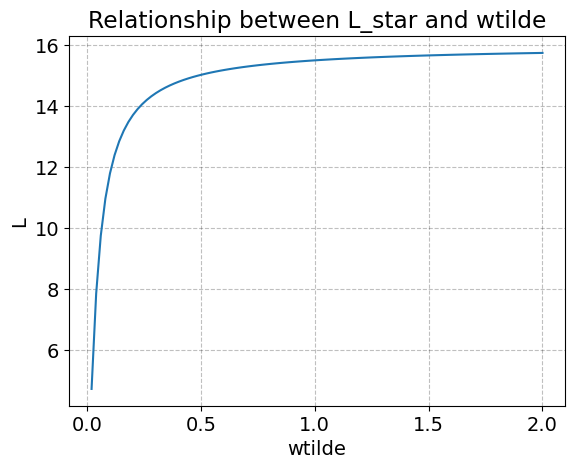

In [231]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm
from IPython.display import display
from sympy import * 

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

alpha = sm.symbols('alpha')
kappa = sm.symbols('kappa')
nu = sm.symbols('nu')
w = sm.symbols('w')
wtilde = sm.symbols("wtilde")
tau = sm.symbols('tau')
C = sm.symbols('C')
G = sm.symbols('G')
L = sm.symbols('L')

# Define objective
objective = sm.log(C**alpha*G**(1-alpha))-nu*L**2/2
objective

# Define constraint
constraint = sm.Eq(kappa+wtilde*L, C)
constraint

# Define constraint as C
C_from_con = sm.solve(constraint, C)
C_from_con[0]

# Insert expresstion into objective
objective_subs = objective.subs(C, C_from_con[0])
objective_subs

# Take derivative w.r.t. L
foc = sm.diff(objective_subs, L)
foc

# Solve for L^*
sol = sm.solve(sm.Eq(foc,0), L)
sol[1]

# Print solution in latex-format to continue calculations
print(sm.latex(sol[1]))

sol_func = sm.lambdify(args=(alpha, kappa, nu, wtilde), expr=sol[1])

alpha_val = 0.5
kappa_val = 1.0
nu_val = 1 / (2 * 16 ** 2)
wtilde_val = (1-tau)*w
wtilde_vec = np.linspace(0,2,100)

L_star = sol_func(alpha_val, kappa_val, nu_val, wtilde_vec)

plt.plot(wtilde_vec, L_star)
plt.xlabel('wtilde')
plt.ylabel('L')
plt.title('Relationship between L_star and wtilde')
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [ ]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [ ]:
L = sm.Symbol('L')
w = sm.Symbol('w')
tau = sm.Symbol('tau')
G = sm.Symbol('G')
alpha = sm.Symbol('alpha')
sigma = sm.Symbol('sigma')
rho = sm.Symbol('rho')
epsilon = sm.Symbol('epsilon')
kappa = sm.Symbol('kappa')
nu = sm.Symbol('nu')

constraint2 = kappa + (1 - tau) * w * L
objective2 = (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1) / (1 - rho) - nu * (L**(1 + epsilon)) / (1 + epsilon)


In [ ]:
objective2 = (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1) / (1 - rho) - nu * (L**(1 + epsilon)) / (1 + epsilon)
objective2

-L**(epsilon + 1)*nu/(epsilon + 1) + (((C**((sigma - 1)/sigma)*alpha + G**((sigma - 1)/sigma)*(1 - alpha))**(sigma/(sigma - 1)))**(1 - rho) - 1)/(1 - rho)

In [ ]:
constraint2 = sm.Eq(kappa + (1 - tau) * w * L, C)
constraint2

Eq(L*w*(1 - tau) + kappa, C)

In [ ]:
C_from_con3 = sm.solve(constraint2, C)[0]
C_from_con3

-L*tau*w + L*w + kappa

In [ ]:
objective_subs3 = objective2.subs(C, C_from_con3)
objective_subs3

-L**(epsilon + 1)*nu/(epsilon + 1) + (((G**((sigma - 1)/sigma)*(1 - alpha) + alpha*(-L*tau*w + L*w + kappa)**((sigma - 1)/sigma))**(sigma/(sigma - 1)))**(1 - rho) - 1)/(1 - rho)

In [ ]:
foc3 = sm.diff(objective_subs3, L)
foc3

alpha*(-tau*w + w)*(-L*tau*w + L*w + kappa)**((sigma - 1)/sigma)*((G**((sigma - 1)/sigma)*(1 - alpha) + alpha*(-L*tau*w + L*w + kappa)**((sigma - 1)/sigma))**(sigma/(sigma - 1)))**(1 - rho)/((G**((sigma - 1)/sigma)*(1 - alpha) + alpha*(-L*tau*w + L*w + kappa)**((sigma - 1)/sigma))*(-L*tau*w + L*w + kappa)) - L**(epsilon + 1)*nu/L

In [ ]:
sol3 = sm.solve(sm.Eq(foc3, 0), L)
sol3[1]

KeyboardInterrupt: 

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [1]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

Iteration 0: x_k0 = [ 184.30750256 -461.99166825], f(x_k0) = 63.351443091130655
Iteration 1: x_k0 = [540.33943722 -21.37031829], f(x_k0) = 74.93286352602217
Iteration 2: x_k0 = [ 446.96944222 -345.20078289], f(x_k0) = 80.35847231181837
Iteration 3: x_k0 = [-551.14845028 -123.36664639], f(x_k0) = 80.89464339099932
Iteration 4: x_k0 = [-320.24136318  410.0888691 ], f(x_k0) = 68.1119672669253
Iteration 5: x_k0 = [-351.50118674  290.9634403 ], f(x_k0) = 53.08326802401512
Iteration 6: x_k0 = [-129.41504663 -381.29217606], f(x_k0) = 42.226396120276426
Iteration 7: x_k0 = [ 292.24729751 -516.50150284], f(x_k0) = 89.74226064144602
Iteration 8: x_k0 = [462.40464526 543.17327907], f(x_k0) = 128.7882266762382
Iteration 9: x_k0 = [ 517.37212161 -101.48285635], f(x_k0) = 70.0114611766188
Iteration 100: x_k0 = [122.94291291 159.55743053], f(x_k0) = 12.022295262294309
Final Iteration 355: x_k0 = [-0.50236784  2.24510886], f(x_k0) = 1.0159901668707763
Global Minimum:
f(x) = 0.0
x = [-2.72447873e-09  4

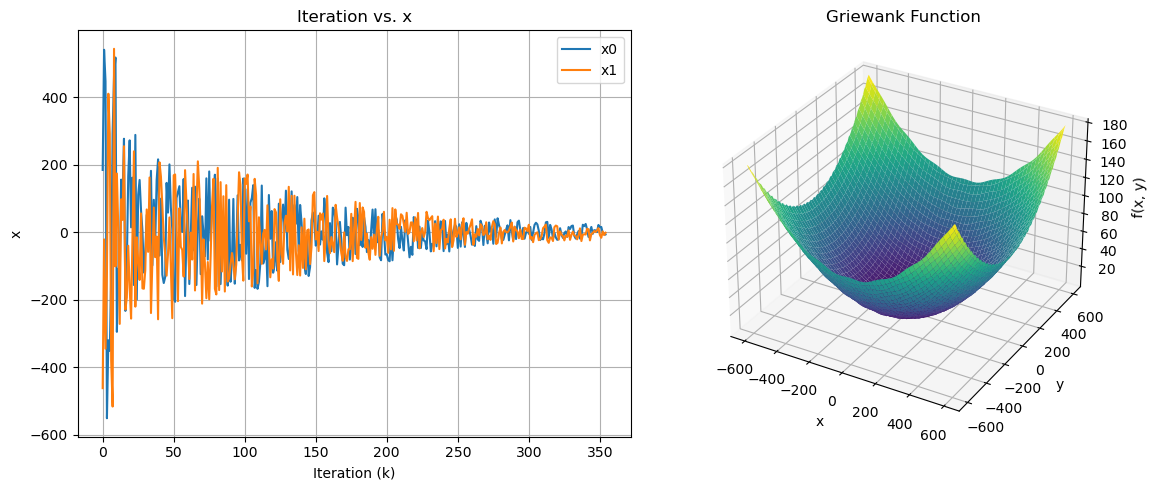

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def refined_global_optimizer(bounds, tau, K_warmup, K_max):
    x_ast = None
    x0_values = []  # List to store x0 values
    x1_values = []  # List to store x1 values
    y_values = []  # List to store y values (iteration number)

    for k in range(K_max):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= K_warmup:
            chi_k = 0.50 * 2 / (1 + np.exp((k - K_warmup) / 100))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_ast
        else:
            x_k0 = x_k

        result = minimize(griewank, x_k0, method='BFGS', tol=tau)
        x_k_ast = result.x

        if x_ast is None or griewank(x_k_ast) < griewank(x_ast):
            x_ast = x_k_ast

        if griewank(x_ast) < tau:
            break

        if k < 10:  # Display the first 10 iterations
            print(f"Iteration {k}: x_k0 = {x_k0}, f(x_k0) = {griewank(x_k0)}")
        if k == 100:  # Display the first 10 iterations
            print(f"Iteration {k}: x_k0 = {x_k0}, f(x_k0) = {griewank(x_k0)}")

        x0_values.append(x_k0[0])  # Append the first value of x_k0 to the list
        x1_values.append(x_k0[1])  # Append the second value of x_k0 to the list
        y_values.append(k)  # Append the iteration number to the list

    # Display the final iteration where the global minimum is reached
    print(f"Final Iteration {k}: x_k0 = {x_k0}, f(x_k0) = {griewank(x_k0)}")

    return x_ast, x0_values, x1_values, y_values

# Set the settings
np.random.seed(1000)
bounds = [-600, 600]
tau = 1e-8
K_warmup = 10
K_max = 1000

# Run the optimizer
global_optimum, x0_values, x1_values, y_values = refined_global_optimizer(bounds, tau, K_warmup, K_max)

print("Global Minimum:")
print("f(x) =", griewank(global_optimum))
print("x =", global_optimum)

# Plotting
fig = plt.figure(figsize=(12, 5))

# Subplot for Iteration vs. x
ax1 = fig.add_subplot(121)
ax1.plot(y_values, x0_values, label='x0')
ax1.plot(y_values, x1_values, label='x1')
ax1.grid(True)
ax1.set_xlabel("Iteration (k)")
ax1.set_ylabel("x")
ax1.set_title("Iteration vs. x")
ax1.legend()

# Subplot for 3D plot of Griewank function
ax2 = fig.add_subplot(122, projection='3d')
x = np.linspace(bounds[0], bounds[1], 100)
y = np.linspace(bounds[0], bounds[1], 100)
X, Y = np.meshgrid(x, y)
Z = griewank([X, Y])
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')
ax2.set_title('Griewank Function')

plt.tight_layout()
plt.show()


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

Iteration 0: x_k0 = [ 184.30750256 -461.99166825], f(x_k0) = 63.351443091130655
Iteration 1: x_k0 = [540.33943722 -21.37031829], f(x_k0) = 74.93286352602217
Iteration 2: x_k0 = [ 446.96944222 -345.20078289], f(x_k0) = 80.35847231181837
Iteration 3: x_k0 = [-551.14845028 -123.36664639], f(x_k0) = 80.89464339099932
Iteration 4: x_k0 = [-320.24136318  410.0888691 ], f(x_k0) = 68.1119672669253
Iteration 5: x_k0 = [-351.50118674  290.9634403 ], f(x_k0) = 53.08326802401512
Iteration 6: x_k0 = [-129.41504663 -381.29217606], f(x_k0) = 42.226396120276426
Iteration 7: x_k0 = [ 292.24729751 -516.50150284], f(x_k0) = 89.74226064144602
Iteration 8: x_k0 = [462.40464526 543.17327907], f(x_k0) = 128.7882266762382
Iteration 9: x_k0 = [ 517.37212161 -101.48285635], f(x_k0) = 70.0114611766188
Final Iteration 371: x_k0 = [-0.5693538   0.87626175], f(x_k0) = 0.3145937672950857
Global Minimum:
f(x) = 0.0
x = [-7.36736252e-09  8.18491035e-12]


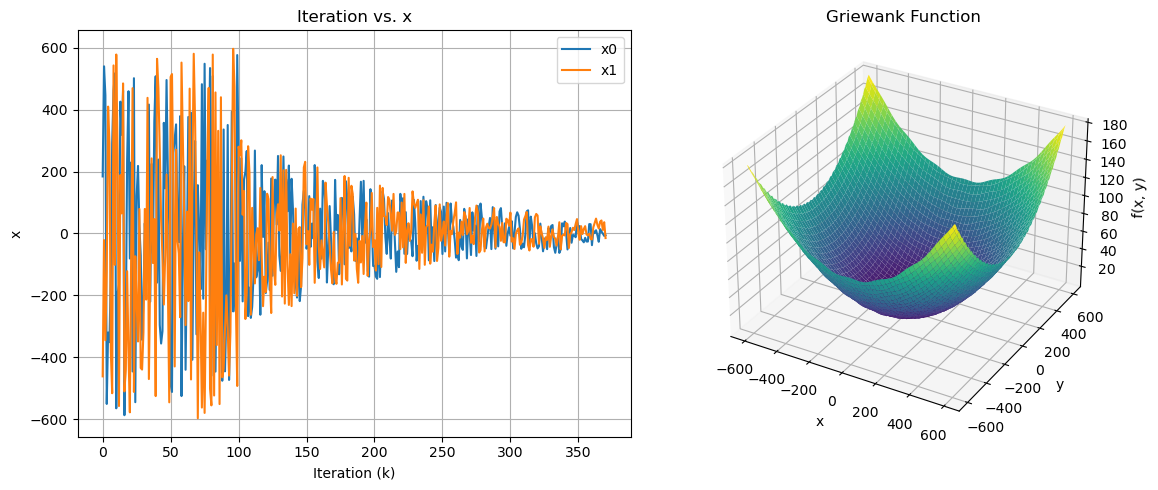

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def refined_global_optimizer(bounds, tau, K_warmup, K_max):
    x_ast = None
    x0_values = []  # List to store x0 values
    x1_values = []  # List to store x1 values
    y_values = []  # List to store y values (iteration number)

    for k in range(K_max):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= K_warmup:
            chi_k = 0.50 * 2 / (1 + np.exp((k - K_warmup) / 100))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_ast
        else:
            x_k0 = x_k

        result = minimize(griewank, x_k0, method='BFGS', tol=tau)
        x_k_ast = result.x

        if x_ast is None or griewank(x_k_ast) < griewank(x_ast):
            x_ast = x_k_ast

        if griewank(x_ast) < tau:
            break

        if k < 10:  # Display the first 10 iterations
            print(f"Iteration {k}: x_k0 = {x_k0}, f(x_k0) = {griewank(x_k0)}")

        x0_values.append(x_k0[0])  # Append the first value of x_k0 to the list
        x1_values.append(x_k0[1])  # Append the second value of x_k0 to the list
        y_values.append(k)  # Append the iteration number to the list

    # Display the final iteration where the global minimum is reached
    print(f"Final Iteration {k}: x_k0 = {x_k0}, f(x_k0) = {griewank(x_k0)}")

    return x_ast, x0_values, x1_values, y_values

# Set the settings
np.random.seed(1000)
bounds = [-600, 600]
tau = 1e-8
K_warmup = 100
K_max = 1000

# Run the optimizer
global_optimum, x0_values, x1_values, y_values = refined_global_optimizer(bounds, tau, K_warmup, K_max)

print("Global Minimum:")
print("f(x) =", griewank(global_optimum))
print("x =", global_optimum)

# Plotting
fig = plt.figure(figsize=(12, 5))

# Subplot for Iteration vs. x
ax1 = fig.add_subplot(121)
ax1.plot(y_values, x0_values, label='x0')
ax1.plot(y_values, x1_values, label='x1')
ax1.grid(True)
ax1.set_xlabel("Iteration (k)")
ax1.set_ylabel("x")
ax1.set_title("Iteration vs. x")
ax1.legend()

# Subplot for 3D plot of Griewank function
ax2 = fig.add_subplot(122, projection='3d')
x = np.linspace(bounds[0], bounds[1], 100)
y = np.linspace(bounds[0], bounds[1], 100)
X, Y = np.meshgrid(x, y)
Z = griewank([X, Y])
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')
ax2.set_title('Griewank Function')

plt.tight_layout()
plt.show()
